In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters


% matplotlib inline

In [2]:
dbname = 'fullsky5year.db'

In [3]:
con = sql.connect(dbname)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 1000
""", con)

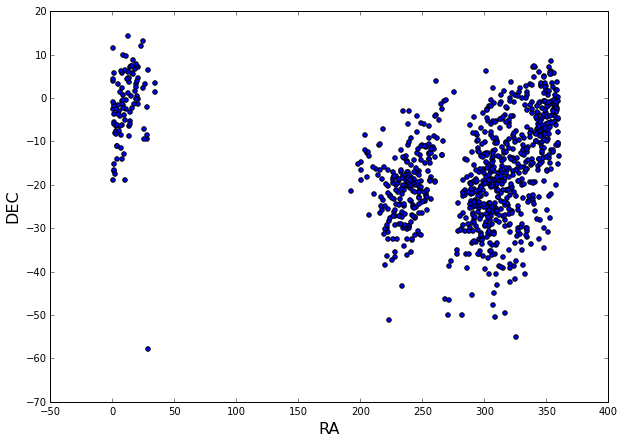

In [5]:
MopsPlotter.plotDataframe(full)

In [6]:
mjd = [51029,51065]
ra = [300,302]
dec = [-20,-18]
nights = mjd[1]-mjd[0]

In [7]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [8]:
len(ssmids['ssmid'])

6017

In [37]:
obj_num = 500

In [38]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [11]:
sample = '(315418)'

In [39]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [40]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
138924,88649592,949815,303.317930,-15.751356,51029.253088,19.123473,37.056180
139344,88649594,2206716,305.255812,-15.549947,51029.253535,21.130024,5.984124
139600,88649594,7688377,306.625745,-14.112378,51029.253535,21.166128,5.788404
139777,88649597,554186,301.720406,-18.017729,51029.253985,19.677898,22.843923
139782,88649597,631911,303.080877,-17.693163,51029.253985,20.164228,14.596172
139803,88649597,949815,303.317732,-15.751519,51029.253985,19.123497,38.065467
139889,88649597,2047159,303.138974,-18.863701,51029.253985,21.058596,6.404593
139892,88649597,2055007,305.314864,-17.360528,51029.253985,20.976677,6.906518
139924,88649597,2457219,304.365594,-17.696775,51029.253985,21.293401,5.159048


In [41]:
objs.to_csv("moresampledata.txt", sep=" ", header=False, index='diaid')

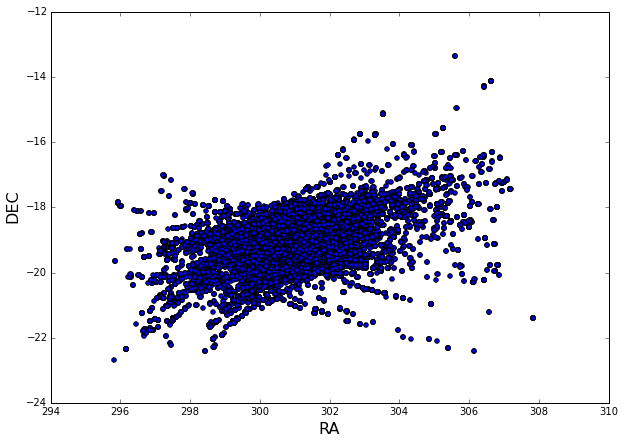

In [42]:
MopsPlotter.plotDataframe(objs)

In [43]:
! rm -rf nightly_testing/
! rm -rf obshist_testing/
! mkdir nightly_testing
! mkdir obshist_testing

In [44]:
! python $MOPS_DIR/bin/splitByNight.py moresampledata.txt nightly_testing obshist_testing

In [45]:
! rm -rf script_testing_run/

In [46]:
! python runMops.py nightly_testing script_testing_run

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [47]:
parameters = yaml.load(file('/Users/joachim/repos/neosim/script_testing_run/parameters.yaml','r'))
tracker = yaml.load(file('/Users/joachim/repos/neosim/script_testing_run/tracker.yaml','r'))

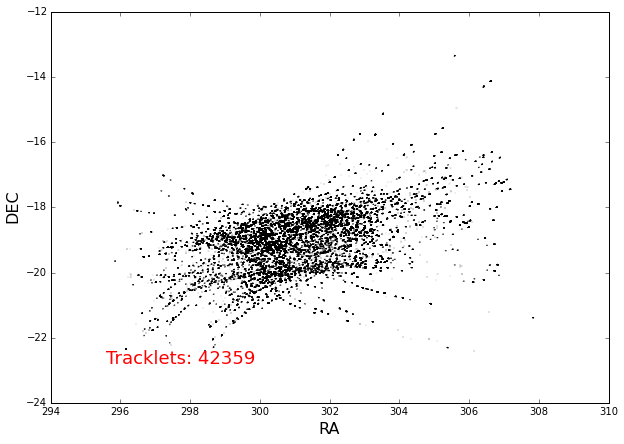

In [48]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.tracklets)

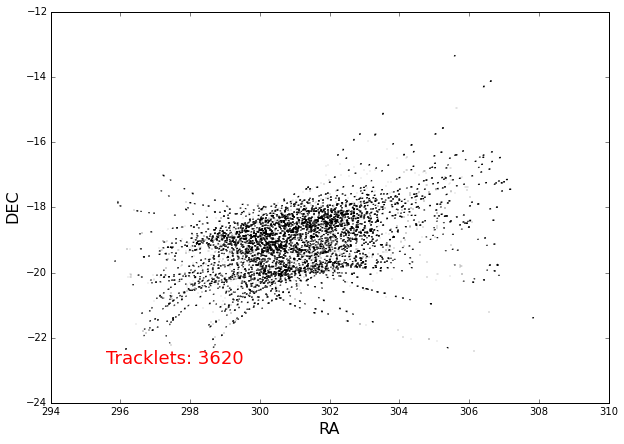

In [49]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.collapsedTrackletsById)

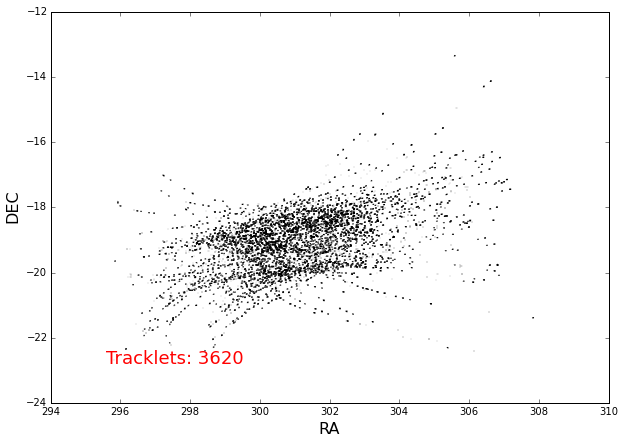

In [50]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.purifiedTrackletsById)

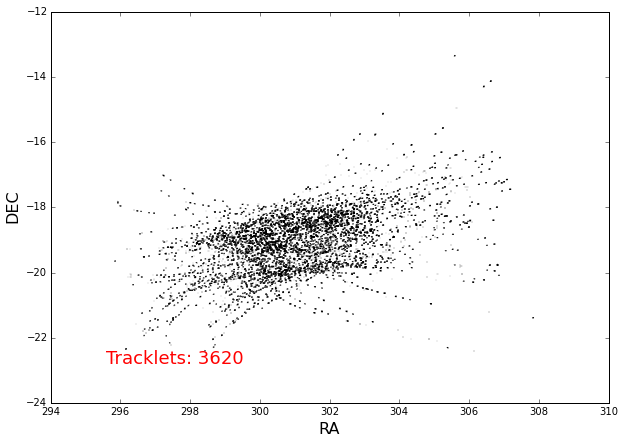

In [51]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.finalTrackletsById)

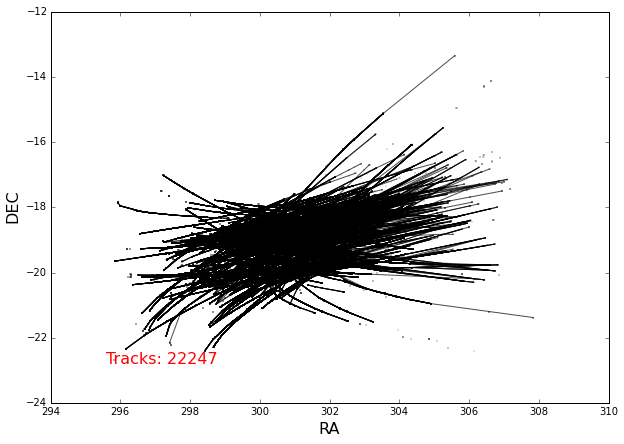

In [52]:
MopsPlotter.plotTracks(tracker.dets, tracker.tracks)

In [53]:
import MopsAnalysis
analysis = MopsAnalysis.runAnalysis(parameters, tracker)

Starting analysis for night_51029_through_51044.track at Wed Jan 20 14:01:20 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracks/night_51029_through_51044.track.results
Finished analysis for night_51029_through_51044.track at Wed Jan 20 14:01:21 2016

Starting analysis for night_51030_through_51045.track at Wed Jan 20 14:01:21 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracks/night_51030_through_51045.track.results
Finished analysis for night_51030_through_51045.track at Wed Jan 20 14:01:23 2016

Starting analysis for night_51033_through_51048.track at Wed Jan 20 14:01:23 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracks/night_51033_through_51048.track.results
Finished analysis for night_51033_through_51048.track at Wed Jan 20 14:01:26 2016

Starting analysis for night_51034_through_51049.track at Wed Jan 20 14:01:26 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracks/night_51034

In [60]:
analysis.startTime

'Wed Jan 20 14:01:20 2016'

In [55]:
analysis.totalTracks

22247

In [56]:
analysis.trueTracks # lots of tracks are still subsets

21381

In [57]:
analysis.falseTracks

866

In [58]:
float(analysis.trueTracks)/analysis.totalTracks

0.9610734031554816

In [61]:
analysis.foundObjects

{327995.0: 1627,
 354112.0: 220,
 369085.0: 1254,
 390308.0: 378,
 413634.0: 656,
 416672.0: 246,
 422160.0: 108,
 436203.0: 803,
 478235.0: 315,
 485334.0: 653,
 498692.0: 814,
 500345.0: 838,
 511947.0: 1388,
 546443.0: 72,
 554186.0: 2743,
 563827.0: 650,
 607981.0: 432,
 631911.0: 2736,
 645233.0: 810,
 663224.0: 678,
 673681.0: 126,
 706901.0: 183,
 716542.0: 386,
 763780.0: 288,
 831682.0: 1459,
 831777.0: 941,
 837864.0: 282,
 906737.0: 498,
 934256.0: 1056,
 949815.0: 2005,
 991361.0: 238,
 1103687.0: 552,
 1110096.0: 500,
 1131243.0: 1284,
 1147771.0: 858,
 1178067.0: 618,
 1187854.0: 1890,
 1211663.0: 829,
 1232523.0: 661,
 1299469.0: 1702,
 1320896.0: 1442,
 1322812.0: 1462,
 1357482.0: 611,
 1364746.0: 444,
 1416140.0: 516,
 1417369.0: 392,
 1425560.0: 411,
 1442166.0: 234,
 1451842.0: 316,
 1466020.0: 44,
 1476481.0: 641,
 1486373.0: 51,
 1487093.0: 719,
 1491111.0: 646,
 1521426.0: 340,
 1542713.0: 1320,
 1552205.0: 390,
 1561172.0: 774,
 1570044.0: 685,
 1576521.0: 1190,

In [63]:
len(analysis.foundObjects)

441

In [62]:
MopsAnalysis.countFindableSSMIDs(objs, 6)

467

In [ ]:
# The few cells will be cleaned up and implemented as part of the analysis run. 